## Observations and Insights 

In [1]:
# Dependencies and Setup
 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined=pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice=len(combined["Mouse ID"].unique())
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined[combined["Mouse ID"]!=duplicated_mouseID]
clean_df


In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group=combined.groupby(['Drug Regimen'])

mean_vol=drug_group['Tumor Volume (mm3)'].mean()
med_vol=drug_group['Tumor Volume (mm3)'].median()
var_vol=drug_group['Tumor Volume (mm3)'].var()
std_vol=drug_group['Tumor Volume (mm3)'].std()
sem_vol=drug_group['Tumor Volume (mm3)'].sem()

volume_table = pd.DataFrame({
    "Mean Volume": mean_vol,
    "Median Volume": med_vol,
    "Variance": var_vol,
    "Standard Deviation": std_vol,
    "SEM": sem_vol,
   
})
volume_table

,Mean Volume,Median Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#need to isolate tumor volume
# Using the aggregation method, produce the same summary statistics in a single line
agg_vol=drug_group.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_vol

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

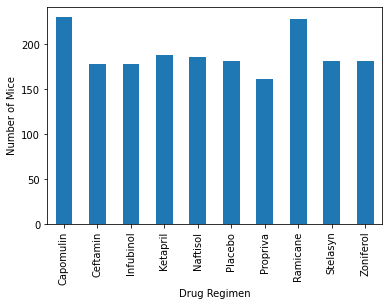

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_count=drug_group['Mouse ID'].count()

mouse_chart = mouse_count.plot(kind='bar')

mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("Number of Mice")


plt.show()
plt.tight_layout()

In [7]:
drug_names=mouse_count.index


<BarContainer object of 10 artists>

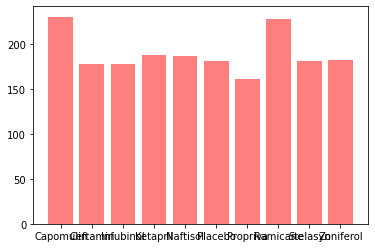

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(drug_names, mouse_count, color='r', alpha=0.5, align="center")

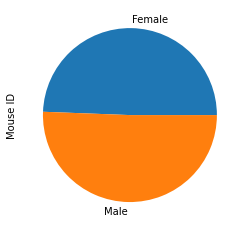

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group= combined.groupby(["Sex"]).count()["Mouse ID"]


gender_group.plot(kind='pie')
plt.show()

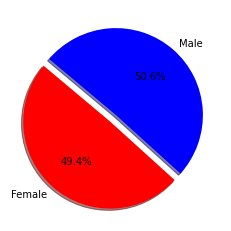

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders=gender_group.index

# The colors of each section of the pie chart
colors = ["red", "blue"]

explode = (0.1, 0)
plt.pie(gender_group, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_df = combined.loc[combined["Timepoint"] == 45]
last_df.head().reset_index()

trt_data = last_df[last_df['Drug Regimen'].isin(['Capomulin' | 'Ramicane' |'Infubinol' | 'Ceftamin'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


SyntaxError: unexpected EOF while parsing (<ipython-input-13-d4a814cd788f>, line 10)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)

volume= []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = trt_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)   

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Mouse Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = combined[combined['Drug Regimen'].isin(['Capomulin'])

#Capomulin_line = plt.plot('Time Point', 'Tumor Volume (mm3)', color="red", label="Capomulin")

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter('Weight (g)', 'Tumor Volume (mm3)', marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_data['Weight (g)']
y_values = Capomulin_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse weight (g)')
plt.ylabel('umor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
 